# Project 7 - Machine Learning

Becca Banning - 10/8/24

https://github.com/rlb913/datafun-07-ml

## Import Dependencies

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Part 1 - Chart a Straight Line

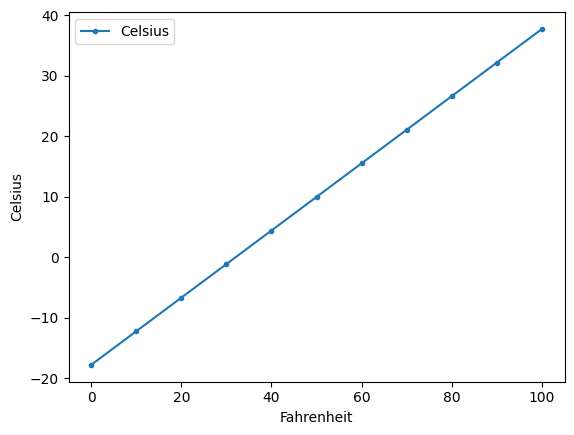

In [3]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

### Section 1 - Data Acquisition

In [4]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [5]:
nyc_df.head()
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [6]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [7]:
nyc_df.Date.dtype

dtype('int64')

In [9]:
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

In [10]:
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [12]:
linear_regression = stats.linregress(x=nyc_df.Date,
                                     y=nyc_df.Temperature)
linear_regression.slope
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Predict

In [13]:
linear_regression.slope * 2024 + linear_regression.intercept
linear_regression.slope * 1890 + linear_regression.intercept

np.float64(36.612865774980335)

### Section 7 - Visualizations

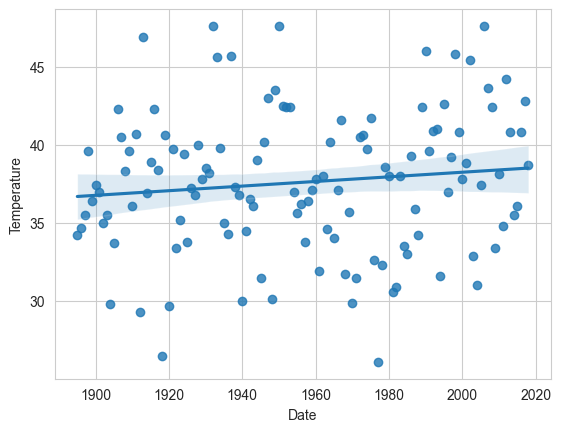

In [14]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)

(10.0, 70.0)

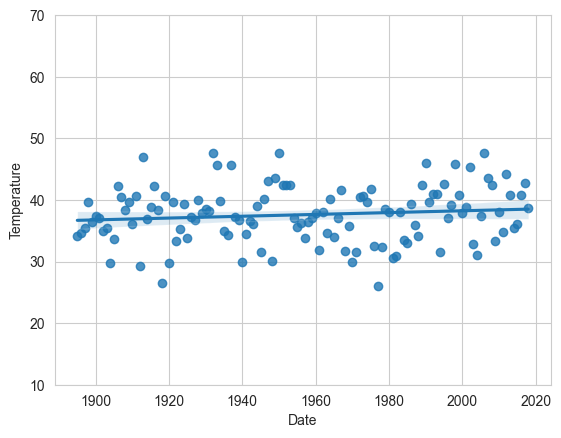

In [15]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10, 70)

## Part 3 - Prediction

### Section 1 - Build the Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values,
    random_state=11)
 
X_train.shape

X_test.shape

### Section 2 - Test the Model

In [ ]:
linear_regression.coef_

linear_regression.intercept_

predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

### Section 3 - Predict 

In [ ]:
# Prediction for 2024
predict = (lambda x: linear_regression.coef_ * x +
           linear_regression.intercept_)
predict(2024)

# Prediction for 1890
predict(1890)

# Prediction for 2080
predict(2080)

### Section 4 - Visualizations

In [ ]:
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature',
                       hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)

In [ ]:
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)

sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10, 70)

## Part 4 - Add Your Insights